# **Title**

Author: Josimar Gabriel Rodrigues de Araújo asasdasd


## 1. Instalar pacotes
No Windows
aasdãsd
as,a,sd

In [ ]:
# install.packages(
#     c("ggspatial", 
#       "raster", 
#       "sdm", 
#       "tidyverse", 
#       "spThin",
#       "geobr", 
#       "geojson"
#      ),
#     dependencies = TRUE, 
#     clean = TRUE
# )

## 2. Carregar bibliotecas 
as,çal,sdx

In [1]:
library(ggspatial)
library(raster)
library(sdm)
library(tidyverse)
library(spThin)
library(scales)
library(sf)
library(geojson)

Loading required package: sp

Loading required package: terra

terra 1.7.78


Compiled with:3.12.1-CAPI-1.18.1

 Running with:3.12.2-CAPI-1.18.2


You should reinstall package 'terra'


sdm 1.2-40 (2024-05-02)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks terra::extract(), raster::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::select()  masks raster::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this p

## 3. Configuração

adadadsa

In [68]:
## Configuração do Script -- 
# define as variáveis usadas posteriormente

# Selecionar Espécies ----
especies <- list(
    sp1 = c("Borreria", "apodiensis"),
    sp2 = c("Pectis", "loiolae"),
    sp3 = c("Ipomoea", "apodiensis")
    # sp4 = Scientifc name
    # ...
)


codigo_estado = "all" # "all" para todos os estados, "RN" para Rio Grande do Norte.

In [12]:
# Cria a estrutura de pastas ----
diretorios <- c(
    "dados",
    "dados/ocorrencia",
    "dados/worldclim",
    "modelos",
    "projecoes",
    "shapefiles"
)

for (diretorio in diretorios) {
    path <- paste0(getwd(), "/", diretorio)
    
   if (!dir.exists(path)){
            dir.create(
            path = path,
            recursive = TRUE
        )   
   }
}

## 4. Baixar ou carregar shapefiles.
No exemplo abaixo, os shapefiles dos Estados do Brasil são baixados e filtrados apenas para a região Nordeste.

Ou, se já tiver os arquivos, cole-os na pasta shapefiles e poderá carregá-los na célula seguinte.

In [13]:
#Baixar shapefile
shape <- geobr::read_state(
    code_state = codigo_estado, 
    year = 2020, 
    simplified = FALSE,
)

# Filtrar a tabela do shapefile por região estado, cidade, etc.  
shape <- shape %>% filter(name_region == "Nordeste")

Using year/date 2020



  |======================================================================| 100%


In [ ]:
# Salvar o arquivo shapefile no disco
write_sf(shape, paste0(getwd(), "/shapefiles/shape.shp"))

In [ ]:
# Carregar shapefile
shape <- read_sf("shapefiles//shape.shp")

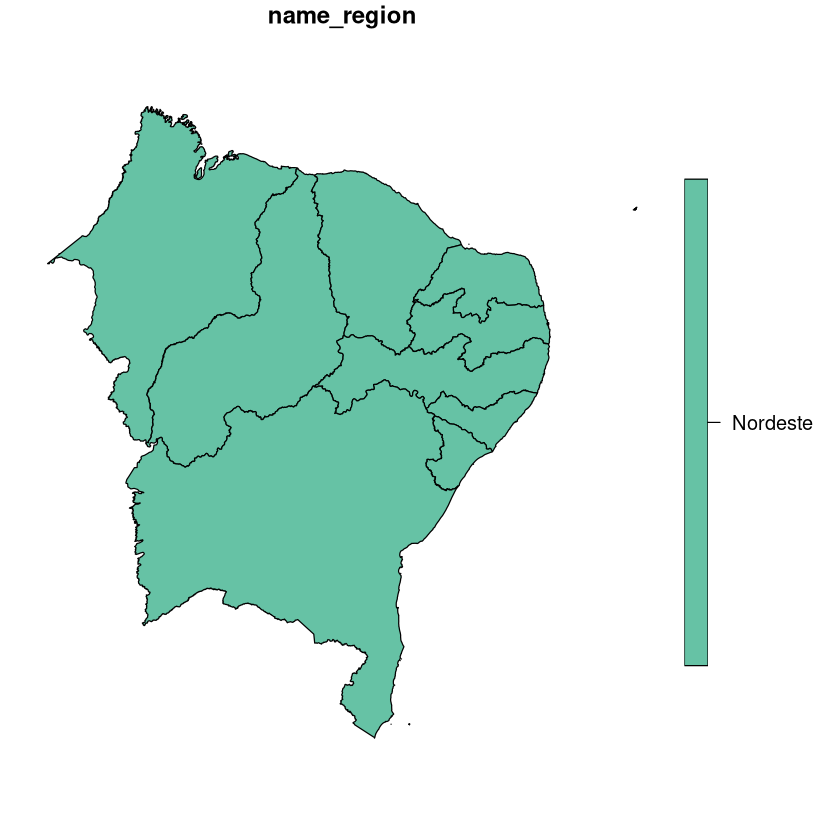

In [14]:
# Visualizar shapefile
plot(shape[5])

## 5. Baixar e/ou carregar dados de ocorrência

#### GBIF

In [74]:
ocorrencias <- data.frame()

for (sp in especies) {
    ocorrencias <- bind_rows(
        ocorrencias,
        geodata::sp_occurrence(
            sp[1],
            sp[2],
            download=TRUE
        )
    )
}

22 records found

0-
22

22 records downloaded

5 records found

0-
5

5 records downloaded

no records found



In [75]:
ocorrencias <- ocorrencias |> select(species, lon, lat)
head(ocorrencias)

,species,lon,lat
,<chr>,<dbl>,<dbl>
1,Borreria apodiensis,-39.69222,-4.734444
2,Borreria apodiensis,-37.83417,-5.590000
3,Borreria apodiensis,-37.83417,-5.590000
4,Borreria apodiensis,-37.83417,-5.590000
5,Borreria apodiensis,-37.83417,-5.590000
6,Borreria apodiensis,-37.67972,-5.574722


#### Outras bases: SpeciesLink, dados de coleções.